In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_rcv1
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import time
from scipy.spatial import distance

In [170]:
def unique(list): 
    '''
    Creates list with unique values from list
    '''
    # intilize a null list 
    unique_list = []
    # traverse for all elements 
    for x in list: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 

    return unique_list
      

In [171]:
#iris
from sklearn.model_selection import train_test_split
data_all, data_label = datasets.load_iris(return_X_y=True) #datasets.load_breast_cancer(return_X_y=True) #datasets.load_iris(return_X_y=True)
data_all_train, data_all_test, data_label_train, data_label_test = train_test_split(data_all, data_label, test_size=0.3)

number_of_classes = len(unique(data_label))
print(number_of_classes)

3


In [172]:
#temporary
colors = np.array(['red', 'blue', 'green', 'orange', 'darkgray', 'powderblue', 'lightsalmon', 'cyan', 'pink'])
#plt.scatter(x=datanpy[:,0], y=datanpy[:,1], c=colors[clustering.labels_])

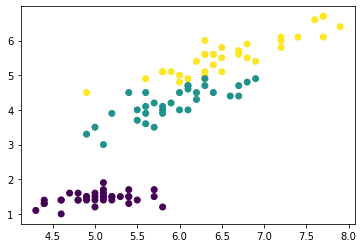

In [173]:
plt.scatter(data_all_train[:,0], data_all_train[:,2],c=data_label_train)

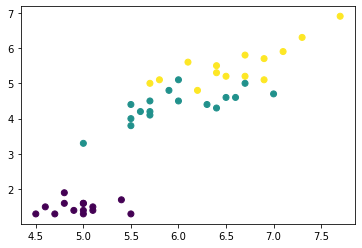

In [174]:
plt.scatter(data_all_test[:,0], data_all_test[:,2],c=data_label_test)

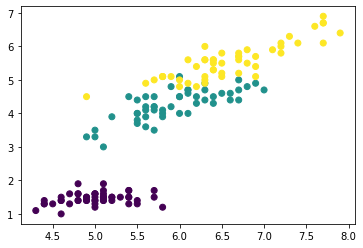

In [175]:
plt.scatter(data_all[:,0], data_all[:,2],c=data_label)

In [176]:
def create_clusters(number_of_clusters, data):
    '''
    Function creating n_clusters from data
    Return array of labels of created clusters.
    '''
    #creating clusters kmeans
    KMeans()
    clust = KMeans(n_clusters=number_of_clusters)
    clust.fit(data)
    #print label of clusters
    return clust.labels_

In [177]:
#create array to group cluster intsnaces
# clusters = np.array([])
# for i in clust.labels_:
#     clusters = np.append(clusters, [i, data_all_train[i]])

# clusters

In [178]:
def group_id_by_cluster(clusters):
    '''
    Function grouping indexes of data by indexes of clusters
    Return dictionary
    '''
    #creating list grouping idexes of training data grouped by cluster label
    clusters_with_id = defaultdict(list)
    for idx, cluster in enumerate(clusters):
        clusters_with_id[cluster].append(idx)

    return clusters_with_id

In [179]:
from collections import defaultdict

number_of_clusters = 15* number_of_classes
clusters = create_clusters(number_of_clusters = number_of_clusters, data = data_all_train)
clusters_with_id = group_id_by_cluster(clusters = clusters)


In [180]:
def median_in_cluster(data_all, indexes):
    count_of_values = len(indexes)
    sum = 0

    # liczba wszystkich wymiarów wzgledem których ma być sumowane
    count_of_features = data_all[0].shape[0]

    median = np.array([])
    
    for feature in range(count_of_features):
        for index in indexes:
            actual_data = data_all[index]
            sum += actual_data[feature]
        median = np.append(median, sum/count_of_values)
        sum = 0

    return median

In [181]:
"""
Function finding id of point in data, nearest to given point. Using for find nerest point of mean in homogeniuos cluster 
TODO czy ma zwracać kilka indesów jeżeli takie same odległosci?
"""
def find_id_of_nearest_point(data_all, indexes, point):
    #id of nearest, for now the first
    id = indexes[0] 
    #minimal distance, for now - the first distance
    min_dist = distance.euclidean(point, data_all[id])

    for i in indexes:
        data = data_all[i]
        dist = distance.euclidean(point, data)
        if min_dist > dist:
            min_dist = dist
            id = i

    return id

In [182]:
"""
Function return index of nearest instance to given
element - index of instance 
indexes_of_data - indexes of instances from which have to find nearest to element
data_all - array of all instances to get data of selected index
"""
def  find_nearest_instance(element, indexes_of_data, data_all):
    point = data_all[element]
    #first temporary index
    id = 0
    #minimal distance, for now - the first distance
    min_dist = distance.euclidean(point, data_all[id])
    for i in indexes_of_data:
        if i == element:
            break
        data = data_all[i]
        dist = distance.euclidean(point, data)
        if min_dist > dist:
            min_dist = dist
            id = i

    return id

In [183]:
'''
data_all - data from getting exact
indexes - indexes of data from data_all
'''
def data_for_indexes(data_all, indexes):
    data_indexes = np.array([])
    for id in indexes:
        data_indexes = np.append(data_indexes, data_all[id])

    return data_indexes

In [184]:
"""
Function return index of majority class
"""
def  find_majority_class(number_of_classes, classes_with_indexes):
    max = len(classes_with_indexes[0])
    majority_class = 0

    for i in range(number_of_classes):
        count = len(classes_with_indexes[i])
        if max < count:
            max = count
            majority_class = i

    return majority_class
    


In [185]:
def mean_point_in_cluster(data_all, indexes):
    count_of_values = len(indexes)
    sum = 0

    # liczba wszystkich wymiarów wzgledem których ma być sumowane
    count_of_features = data_all[0].shape[0]

    mean_point = np.array([])
    
    for feature in range(count_of_features):
        sum = 0
        for index in indexes:
            actual_data = data_all[index]
            sum += actual_data[feature]
        mean_point = np.append(mean_point, sum/count_of_values)

    return mean_point


In [186]:
def group_cluster_by_class(cluster):
    '''
    Function creates array with indexes in cluster grouped by class label
    '''
    #initialize array with 0 occurrence of each class
    classes_with_indexes = []
    #classes_count = np.array([])

    #initialize array
    for i in range(number_of_classes):
    
        classes_with_indexes.append([])


    for instance_id in cluster:
    #checking label of instance
        class_label_of_instance = data_label_train[instance_id]

        #add to array for class label
        classes_with_indexes[class_label_of_instance].append(instance_id)

    return classes_with_indexes
    #print('classes count:',classes_count)
    #print('classes data with id:',classes_with_indexes)
group_cluster_by_class(clusters_with_id[5])


[[16], [], []]

In [187]:
def check_homogenious(cluster):
    '''
    Function checking if the cluster is homogenious or not
    Return True if is, False if not.
    '''
    grouped_cluster = group_cluster_by_class(cluster)
    
    is_homogeniuos = True
    count_of_classes_in_cluster = 0
    for i in range(number_of_classes):
        if(len(grouped_cluster[i]) > 0):
            count_of_classes_in_cluster+=1
    if (count_of_classes_in_cluster > 1):
        is_homogeniuos = False
    
    return is_homogeniuos


In [188]:
clusters_with_id[5]

[16]

In [189]:
#utowrzenie tablicy n wartości, gdzie n to liczba klas, w której bedzie trzymana liczba wystapień danej klasy

classes_with_data = [] #zestaw instancji danych dla każdej z klasy tj np classes_data[0] - dane instancji klasy pierwszej w klastrze
classes_with_indexes = []
#create empty reduced dataset
reduced_set = []
reduced_data = []

classes_count = np.array([])
for i in range(number_of_classes):
    classes_count = np.append(classes_count, 0)
    classes_with_data.append([])
    classes_with_indexes.append([])
    reduced_set.append([])
for i in range(number_of_classes):
    reduced_set.append([])

#for each cluster
for i in range(number_of_clusters):
    #for each instance in cluster
    for instance_id in clusters_with_id[i]:

        #checking label of instance
        class_label_of_instance = data_label_train[instance_id]

        #add to array for class label
        classes_with_data[class_label_of_instance].append(data_all_train[instance_id])
        classes_with_indexes[class_label_of_instance].append(instance_id)

        #incrementing the count of occurrances actual class
        classes_count[class_label_of_instance]+=1
    
    #print('classes count:',classes_count)
    #print('classes data with id:',classes_with_indexes)


    #checking if the cluster is homogenious
    is_homogeniuos = True
    count_of_classes_in_cluster = 0
    for j in range(number_of_classes):
        if(classes_count[j] > 0):
            count_of_classes_in_cluster+=1
    if (count_of_classes_in_cluster > 1):
        is_homogeniuos = False


    if (is_homogeniuos):
        print('homogenious')
        cm = find_majority_class(number_of_classes, classes_with_indexes)
        #obliczyć średnia wszystkich wartości instancji w klastrze w postaci obiektu-
        #dla każdej instancji obliczyć odległość euklidesową od tej średniej i zapisać w jakiejś pomocniczej np.array?
        #wybrać 
        mean_point = mean_point_in_cluster(data_all=data_all_train, indexes=clusters_with_id[i])
        #print(mean_point)
        accept_id = find_id_of_nearest_point(data_all = data_all_train, indexes = clusters_with_id[i], point = mean_point)
        #print(accept_id)
        reduced_set[cm].append(data_all_train[accept_id])
        reduced_data.append(data_all_train[accept_id])
        
    else:
        """
        TODO 
        majority_class_label 
        for i in set of other class 
            for data with class 


        robimy liste labeli, sprawdzamy, która jest najczęsciej - ta zapamiętujemy i wywalamy z listy;
        dla każdej klasy z listy
            dla każdego elementu z tej klasy w tym klastrze
                szukamy elementu z klasy głowenj, który jest najbliżej tego - potrzebny tez indeks
                szukamy elemntu z tej klasy, który jest najbliżej tego znalezonego z głównej
        """
        #majority class
        cm = find_majority_class(number_of_classes, classes_with_indexes)
        print(cm)

        for class_id in range(number_of_classes):
            if class_id == cm:
                break
            for el in classes_with_indexes[class_id]:
                #najbliższy element do badanego spośród głownej klasy
                nearest_of_majority_class = find_nearest_instance(element = el, indexes_of_data = classes_with_indexes[cm], data_all = data_all_train)
                print('nearest_of_majority_class:',nearest_of_majority_class)
                #reduced_set = np.append(reduced_set, data_all_train[nearest_of_majority_class])
                reduced_set[cm].append(data_all_train[nearest_of_majority_class])
                reduced_data.append(data_all_train[nearest_of_majority_class])
                #najbliżsy element do badanego spośród tej samej klasy co badany
                nearest_of_actual_class = find_nearest_instance(element = el, indexes_of_data = classes_with_indexes[class_id], data_all = data_all_train)
                print('nearest_of_actual_class:', nearest_of_actual_class)
                #reduced_set = np.append(reduced_set, data_all_train[nearest_of_actual_class])
                reduced_set[cm].append(data_all_train[nearest_of_actual_class])
                reduced_data.append(data_all_train[nearest_of_actual_class])


        
    #reset classes counter     
    classes_count = np.array([])
    classes_with_data = [] #zestaw instancji danych dla każdej z klasy tj np classes_data[0] - dane instancji klasy pierwszej w klastrze
    classes_with_indexes = []
    for j in range(number_of_classes):
        classes_count = np.append(classes_count, 0)
        classes_with_data.append([])
        classes_with_indexes.append([])
        

homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
homogenious
1
homogenious
homogenious


In [190]:
#final labels
reduced_colors = []

for i in range(number_of_classes):
    for id in reduced_set[i]:
        reduced_colors.append(i)


colors = {0:'red',1:'green',2:'blue', 3: 'purple'}

In [191]:
reduced_set
tmp = []
for i in range(number_of_classes):
    for el in reduced_set[i]:
        tmp.append(el.tolist())

tmp

[[5.1, 3.4, 1.5, 0.2],
 [5.8, 4.0, 1.2, 0.2],
 [4.9, 3.1, 1.5, 0.2],
 [5.3, 3.7, 1.5, 0.2],
 [4.4, 3.0, 1.3, 0.2],
 [4.6, 3.6, 1.0, 0.2],
 [4.6, 3.2, 1.4, 0.2],
 [5.5, 4.2, 1.4, 0.2],
 [5.1, 3.8, 1.9, 0.4],
 [5.4, 3.4, 1.7, 0.2],
 [5.7, 3.8, 1.7, 0.3],
 [5.1, 3.3, 1.7, 0.5],
 [6.2, 2.9, 4.3, 1.3],
 [5.6, 2.9, 3.6, 1.3],
 [4.9, 2.4, 3.3, 1.0],
 [5.8, 2.6, 4.0, 1.2],
 [6.7, 3.1, 4.7, 1.5],
 [5.6, 3.0, 4.5, 1.5],
 [6.3, 3.3, 4.7, 1.6],
 [6.1, 2.9, 4.7, 1.4],
 [5.7, 3.0, 4.2, 1.2],
 [5.5, 2.4, 3.7, 1.0],
 [6.2, 2.2, 4.5, 1.5],
 [6.7, 3.1, 4.4, 1.4],
 [6.0, 2.2, 4.0, 1.0],
 [5.2, 2.7, 3.9, 1.4],
 [6.8, 3.0, 5.5, 2.1],
 [7.7, 2.8, 6.7, 2.0],
 [6.3, 2.5, 5.0, 1.9],
 [5.6, 2.8, 4.9, 2.0],
 [7.7, 3.8, 6.7, 2.2],
 [6.4, 2.8, 5.6, 2.2],
 [7.2, 3.2, 6.0, 1.8],
 [6.1, 3.0, 4.9, 1.8],
 [6.3, 3.4, 5.6, 2.4],
 [6.7, 3.3, 5.7, 2.5],
 [6.5, 3.0, 5.5, 1.8],
 [6.0, 2.2, 5.0, 1.5],
 [7.2, 3.6, 6.1, 2.5],
 [4.9, 2.5, 4.5, 1.7],
 [7.7, 3.0, 6.1, 2.3],
 [6.5, 3.2, 5.1, 2.0],
 [7.4, 2.8, 6.1, 1.9],
 [5.8, 2.8,

In [192]:
#prepare arrays for scatter plots and testing 
np_red_data = np.array(tmp)
np_red_col = np.array(reduced_colors)

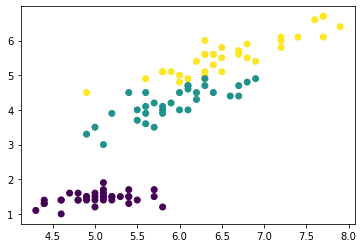

In [193]:
plt.scatter(data_all_train[:,0], data_all_train[:,2],c=data_label_train)

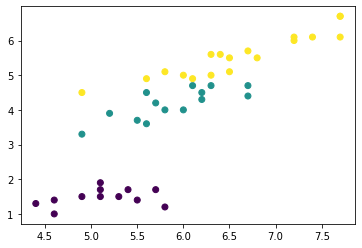

In [194]:
plt.scatter(np_red_data[:,0], np_red_data[:,2],c=np_red_col)

In [195]:
#test
t = time.process_time()
#knn classify - measure time and accuracy for original train dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_all_train,data_label_train)
accuracy = knn.score(data_all_test,data_label_test)
elapsed = time.process_time() - t

print("Time:  ", elapsed)
print('Accuracy:  ', accuracy)
print('Count of instances', len(data_all_train))

t = time.process_time()
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(np_red_data, np_red_col)
accuracy = knn2.score(data_all_test,data_label_test)
elapsed = time.process_time() - t

print("Time:  ", elapsed)
print('Accuracy:  ', accuracy)
print('Count of instances', len(reduced_data))

Time:   0.0
Accuracy:   0.9555555555555556
Count of instances 105
Time:   0.015625
Accuracy:   0.9555555555555556
Count of instances 44


In [196]:
t = time.process_time()
#svn classify - measure time and accuracy for original train dataset
from sklearn import svm
svn = svm.SVC()
svn.fit(data_all_train,data_label_train)
accuracy = svn.score(data_all_test,data_label_test)
elapsed = time.process_time() - t

print("Time:  ", elapsed)
print('Accuracy:  ', accuracy)
print('Count of instances', len(data_all_train))

t = time.process_time()
svn2 = svm.SVC()
svn2.fit(np_red_data, np_red_col)
accuracy = svn2.score(data_all_test,data_label_test)
elapsed = time.process_time() - t

print("Time:  ", elapsed)
print('Accuracy:  ', accuracy)
print('Count of instances', len(np_red_data))

Time:   0.0
Accuracy:   0.9333333333333333
Count of instances 105
Time:   0.0
Accuracy:   0.9333333333333333
Count of instances 44
